# Pokémon Yellow Scatter Plot

This notebook fetches Pokémon data using a SPARQL query from Wikidata and creates a scatter plot showing only the yellow Pokémon, displaying their mass on the x-axis and their labels on the y-axis.

In [1]:

from SPARQLWrapper import SPARQLWrapper, JSON
import pandas as pd
import matplotlib.pyplot as plt

def querySparql(query):
    sparql = SPARQLWrapper("https://query.wikidata.org/sparql")
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    results = sparql.queryAndConvert()
    return results['results']['bindings']
    

## Define the SPARQL Query

In [2]:

pokemonQuery = """
SELECT DISTINCT ?pokemon ?pokemonLabel ?pokedexNumber ?color ?colorLabel ?mass
WHERE
{
    ?pokemon wdt:P31/wdt:P279* wd:Q3966183 .
    ?pokemon p:P1685 ?statement.
    ?pokemon wdt:P462 ?color.
    ?pokemon wdt:P2067 ?mass. 
    ?statement ps:P1685 ?pokedexNumber;
              pq:P972 wd:Q20005020.
    FILTER ( !isBLANK(?pokedexNumber) ) .
    SERVICE wikibase:label { bd:serviceParam wikibase:language "en" }
}
ORDER BY (?pokedexNumber)
"""
    

## Fetch Data and Convert to DataFrame

In [3]:

# Fetch data using the SPARQL query
sparql_results = querySparql(pokemonQuery)

# Convert SPARQL JSON results into a DataFrame
data = []
for result in sparql_results:
    data.append({
        "pokemon": result['pokemon']['value'],
        "pokemonLabel": result['pokemonLabel']['value'],
        "pokedexNumber": int(result['pokedexNumber']['value']),
        "color": result['color']['value'],
        "colorLabel": result['colorLabel']['value'],
        "mass": float(result['mass']['value']),
    })

# Create a DataFrame
df = pd.DataFrame(data)
df
    

,pokemon,pokemonLabel,pokedexNumber,color,colorLabel,mass
0,http://www.wikidata.org/entity/Q847571,Bulbasaur,1,http://www.wikidata.org/entity/Q3133,green,6.9
1,http://www.wikidata.org/entity/Q847571,Bulbasaur,1,http://www.wikidata.org/entity/Q3133,green,15.2
2,http://www.wikidata.org/entity/Q1636903,Ivysaur,2,http://www.wikidata.org/entity/Q3133,green,13.0
3,http://www.wikidata.org/entity/Q2283930,Venusaur,3,http://www.wikidata.org/entity/Q3133,green,100.0
4,http://www.wikidata.org/entity/Q3178753,Charmander,4,http://www.wikidata.org/entity/Q3142,red,8.5
...,...,...,...,...,...,...
508,http://www.wikidata.org/entity/Q115731520,Clodsire,980,http://www.wikidata.org/entity/Q47071,brown,491.6
509,http://www.wikidata.org/entity/Q116698220,Kingambit,983,http://www.wikidata.org/entity/Q23445,black,120.0
510,http://www.wikidata.org/entity/Q116698220,Kingambit,983,http://www.wikidata.org/entity/Q23445,black,264.6
511,http://www.wikidata.org/entity/Q115117784,Gimmighoul,999,http://www.wikidata.org/entity/Q47071,brown,0.1


## Scatter Plot for Yellow Pokémon

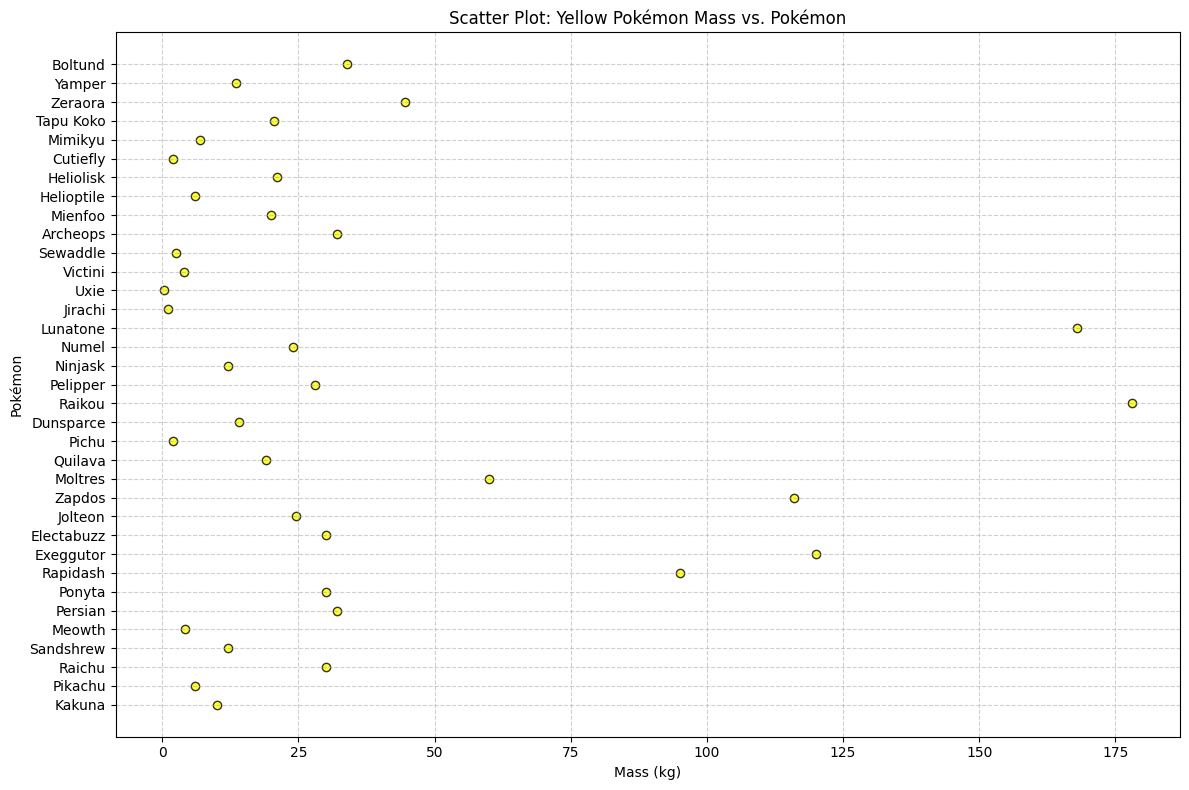

In [4]:

# Check if DataFrame is populated
if df.empty:
    print("No data retrieved from the query.")
else:
    # Scatter plot: Yellow Pokémon Mass vs. Pokémon Labels
    yellow_pokemon = df[df['colorLabel'].str.lower() == "yellow"]  # Filter yellow Pokémon
    plt.figure(figsize=(12, 8))
    plt.scatter(yellow_pokemon['mass'], yellow_pokemon['pokemonLabel'], color="yellow", alpha=0.8, edgecolors="black")
    plt.title("Scatter Plot: Yellow Pokémon Mass vs. Pokémon")
    plt.xlabel("Mass (kg)")
    plt.ylabel("Pokémon")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()
    